<a href="https://colab.research.google.com/github/TetianaMar-888/Python_for_ds_tasks/blob/main/Marinoshenko_Tetiana_HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подальших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [5]:
pip install --upgrade scikit-learn

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
import statsmodels.api as sm

In [7]:
import sklearn
print("sklearn version:", sklearn.__version__)

#Перевіримо документацію функції
from sklearn.metrics import mean_squared_error
help(mean_squared_error)

sklearn version: 1.7.0
Help on function mean_squared_error in module sklearn.metrics._regression:

mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    Mean squared error regression loss.
    
    Read more in the :ref:`User Guide <mean_squared_error>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    multioutput : {'raw_values', 'uniform_average'} or array-like of shape             (n_outputs,), default='uniform_average'
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
    
        'raw_values' :
            Returns a full set of errors in case of multioutput inp

# Знайомство з даними

\**Завдання 1.**  Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
cars_df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/cars.csv')
# Огляд перших 5 записів з датафрейму
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [10]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [11]:
cars_df.info()                                 # Інформація про типи й пропущені значення
cars_df.dtypes                                 # Типи даних кожного стовпця

len(cars_df.select_dtypes("object").columns)

cars_df.select_dtypes(include='number')        # Вибір тільки числових колонок

cars_df.shape                                  # К-ть рядків та колонок

# .unique()
cars_df['Brand'].unique()

# Кількість унікальних значень по кожній колонці
cars_df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


,0
Car_ID,100
Brand,11
Model,58
Year,6
Kilometers_Driven,18
Fuel_Type,2
Transmission,2
Owner_Type,3
Mileage,15
Engine,36


In [12]:
cars_df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [13]:
cars_df.select_dtypes(include="object").columns

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

In [14]:
#Перевіримо чи немає нульових значень в нашому наборі даних
cars_df.isnull().values.any()

np.False_

In [15]:
null_count = cars_df.isnull().sum()
null_percentage = round((cars_df.isnull().sum() / cars_df.shape[0]) * 100, 2)
null_percentage

,0
Car_ID,0.0
Brand,0.0
Model,0.0
Year,0.0
Kilometers_Driven,0.0
Fuel_Type,0.0
Transmission,0.0
Owner_Type,0.0
Mileage,0.0
Engine,0.0


#Висновки
В наборі даних 8 числових та 5 категоріальних колонок, з яких
- 2 бінарні ("Fuel_Type" та "Transmission" мають лише по 2 значення)
- 1 мультикатегоріальна "Owner_Type" , в якій можна встановити відношення порядку
- 2 мультикатегоріальні зі значеннями, для яких немає відношення порядку "Brand", "Model"

Всього 13 колонок та 100 записів. Пропущених та нульових значень немає.

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(cars_df.drop('Price', axis=1), cars_df['Price'], test_size=0.2, random_state=12)

In [17]:
#X_train, X_test, y_train, y_test

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

<Axes: xlabel='Fuel_Type', ylabel='Price'>

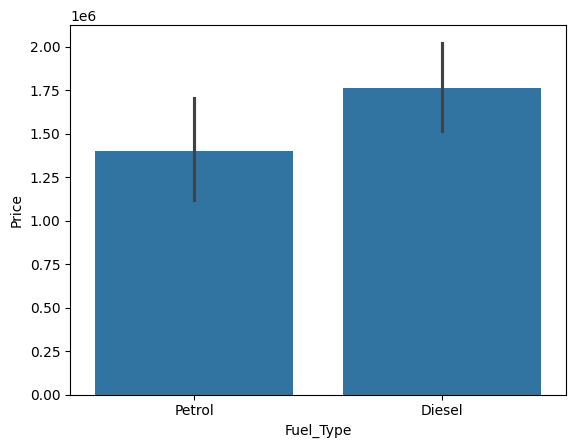

In [18]:
#1
sns.barplot(x='Fuel_Type', y='Price', data=cars_df)

In [19]:
Fuel_Type_codes = {'Petrol': 0, 'Diesel': 1}
cars_df['Fuel_Type_Code'] = cars_df['Fuel_Type'].map(Fuel_Type_codes)

In [20]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Code
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,0
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,0
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,0
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,1
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,1


<Axes: xlabel='Transmission', ylabel='Price'>

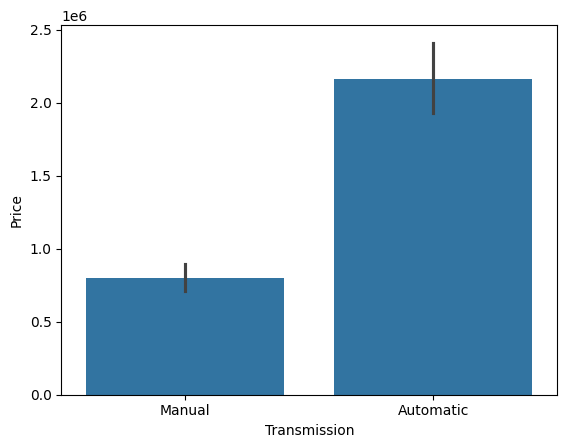

In [21]:
sns.barplot(x='Transmission', y='Price', data=cars_df)

In [22]:
Transmission_codes = {'Manual': 0, 'Automatic': 1}
cars_df['Transmission_Code'] = cars_df['Transmission'].map(Transmission_codes)

In [23]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Code,Transmission_Code
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,0,0
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,0,1
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,0,1
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,1,0
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,1,1


<Axes: xlabel='Brand', ylabel='Price'>

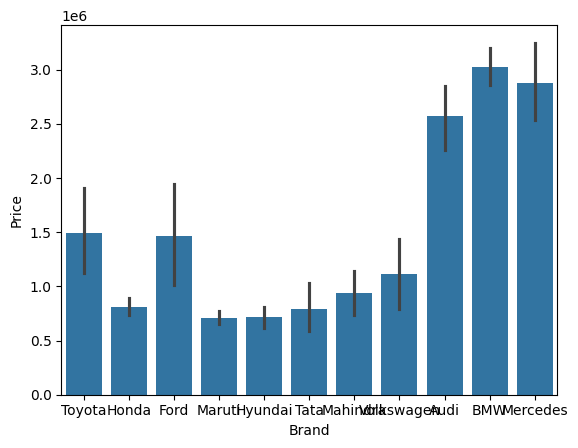

In [24]:
#2
sns.barplot(x='Brand', y='Price', data=cars_df)

In [25]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [26]:
one_hot_test = enc.transform(X_test[['Brand']]).toarray()
one_hot_test
one_hot_train = enc.transform(X_train[['Brand']]).toarray()
one_hot_train

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.

In [27]:
enc.categories_[0]

array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [28]:
# Додаємо до X_train
brand_train_df = pd.DataFrame(one_hot_train, columns=enc.get_feature_names_out(['Brand']), index=X_train.index)
X_train = pd.concat([X_train.reset_index(drop=True), brand_train_df.reset_index(drop=True)], axis=1)

# Додаємо до X_test
brand_test_df = pd.DataFrame(one_hot_test, columns=enc.get_feature_names_out(['Brand']), index=X_test.index)
X_test = pd.concat([X_test.reset_index(drop=True), brand_test_df.reset_index(drop=True)], axis=1)


In [29]:
X_test.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen
0,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen
0,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
#sns.barplot(x='Model', y='Price', data=cars_df[:10])

In [32]:
top_models = cars_df['Model'].value_counts().nlargest(5).index

In [33]:
print(top_models)

Index(['Mustang', 'C-Class', 'Altroz', 'Verna', 'Passat'], dtype='object', name='Model')


In [34]:
# Показує кількість унікальних моделей у кожного бренду
cars_df.groupby('Brand')['Model'].nunique().sort_values(ascending=False)

,Model
Brand,
Audi,6
BMW,6
Ford,6
Hyundai,6
Volkswagen,6
Toyota,6
Tata,6
Mercedes,5
Honda,4


In [35]:
# Показує список моделей для кожного бренду
models_by_brand = cars_df.groupby('Brand')['Model'].unique()
for brand, models in models_by_brand.items():
    print(f"{brand}: {list(models)}")

Audi: ['A4', 'Q3', 'A6', 'A3', 'Q7', 'A5']
BMW: ['X1', '5 Series', 'X3', '7 Series', 'X5', '3 Series']
Ford: ['Mustang', 'Endeavour', 'Figo', 'Aspire', 'Ranger', 'EcoSport']
Honda: ['Civic', 'City', 'WR-V', 'BR-V']
Hyundai: ['Sonata', 'Creta', 'Verna', 'Elantra', 'Santro', 'Venue']
Mahindra: ['Scorpio', 'Thar', 'XUV300']
Maruti: ['Swift', 'Ertiga', 'Vitara', 'S-Cross']
Mercedes: ['C-Class', 'GLC', 'E-Class', 'GLE', 'GLA']
Tata: ['Nexon', 'Harrier', 'Altroz', 'Safari', 'Tigor', 'Tiago']
Toyota: ['Corolla', 'Innova', 'Fortuner', 'Yaris', 'Camry', 'Innova Crysta']
Volkswagen: ['Polo', 'Tiguan', 'Passat', 'Ameo', 'T-Roc', 'Vento']


In [36]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

# Fuel_Type і Transmission - в мене питання якщо я кодувала їх в cars_df, а колонка Brand  кодувалась і додалась до X_test - чи не є це помилкою для подальшого аналізу? Можливо потрібно ділити Датафрейм після всього кодування? (я про послідовність завдань) чи я щось не те роблю? Буду вдячна за коментар

In [37]:
X_train['Fuel_Type_Code'] = X_train['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1})
X_test['Fuel_Type_Code'] = X_test['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1})

X_train['Transmission_Code'] = X_train['Transmission'].map({'Manual': 0, 'Automatic': 1})
X_test['Transmission_Code'] = X_test['Transmission'].map({'Manual': 0, 'Automatic': 1})

Очікуваний результат після трансформацій:

In [38]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Fuel_Type_Code,Transmission_Code
0,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1
1,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0
4,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Fuel_Type_Code,Transmission_Code
0,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
1,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0
2,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0
3,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
4,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [39]:
X_train.select_dtypes(include='number')

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Fuel_Type_Code,Transmission_Code
0,84,2019,22000,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1
1,56,2018,28000,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,27,2018,28000,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,55,2017,32000,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0
4,20,2017,26000,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,4,2020,30000,23,1248,74,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1,0
76,3,2017,20000,10,4951,395,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
77,7,2018,45000,15,2179,140,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
78,28,2019,22000,18,1995,187,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1


In [40]:
X_train_num = X_train.select_dtypes(include='number')
data_combined = pd.concat([X_train_num, y_train], axis=1)
data_combined.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Fuel_Type_Code,Transmission_Code,Price
0,84.0,2019.0,22000.0,18.0,1498.0,148.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,800000.0
1,56.0,2018.0,28000.0,17.0,1968.0,187.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1000000.0
2,27.0,2018.0,28000.0,15.0,1984.0,241.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2500000.0
3,55.0,2017.0,32000.0,18.0,1598.0,103.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,600000.0
4,20.0,2017.0,26000.0,12.0,1991.0,241.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,850000.0


In [41]:
corr_X_y_train = data_combined.corr()
corr_X_y_train

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Fuel_Type_Code,Transmission_Code,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,-0.090537,-0.084381,-0.056331
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.248515,-0.200603,0.043569
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,0.332351,-0.066491,-0.043476
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,0.070112,-0.399164,0.109896
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.174455,0.456296,-0.067316
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,-0.076357,0.586910,-0.181481
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.412468,-0.070099,0.024052
Brand_Audi,0.089473,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.008336,0.265132,-0.004442
Brand_BMW,0.048335,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,0.048475,0.283188,-0.047101
Brand_Ford,-0.020240,-0.150454,-0.009761,-0.296480,0.184231,0.240501,-0.161451,-0.118678,-0.126761,1.000000,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.190586,-0.109812,-0.122816,0.233873


In [42]:
corr_X_y_train['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Brand_Honda,0.293302
Brand_Ford,0.233873
Brand_Maruti,0.218932
Mileage,0.109896
Owner_Type_Codes,0.068938
Brand_Tata,0.049210
Year,0.043569
Seats,0.024052
Brand_Audi,-0.004442


#Висновки
В нашій кореляційній матриці немає жодної ознаки, яка має кореляцію з цільовою змінною Price більшу ніж +/- 0.5.
Найближчі - це:
    Brand_Honda	0.29
    Brand_Ford: 0.234
    Power: -0.181
    Transmission_Code: -0.221
    Brand_Mahindra	-0.22
    Brand_Mercedes	-0.26
Жодна окрема ознака не має сильного впливу на ціну

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [43]:
X_test.select_dtypes(include='number')

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Fuel_Type_Code,Transmission_Code
0,18,2016,38000,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
1,42,2019,26000,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0
2,93,2017,32000,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0
3,15,2020,18000,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
4,69,2019,26000,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0
5,32,2017,32000,22,1582,126,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
6,90,2018,32000,17,1197,81,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0
7,16,2017,42000,25,1498,98,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
8,22,2020,15000,18,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0
9,61,2019,24000,17,1497,113,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             80 non-null     int64  
 1   Year               80 non-null     int64  
 2   Kilometers_Driven  80 non-null     int64  
 3   Mileage            80 non-null     int64  
 4   Engine             80 non-null     int64  
 5   Power              80 non-null     int64  
 6   Seats              80 non-null     int64  
 7   Brand_Audi         80 non-null     float64
 8   Brand_BMW          80 non-null     float64
 9   Brand_Ford         80 non-null     float64
 10  Brand_Honda        80 non-null     float64
 11  Brand_Hyundai      80 non-null     float64
 12  Brand_Mahindra     80 non-null     float64
 13  Brand_Maruti       80 non-null     float64
 14  Brand_Mercedes     80 non-null     float64
 15  Brand_Tata         80 non-null     float64
 16  Brand_Toyota       80 non-nu

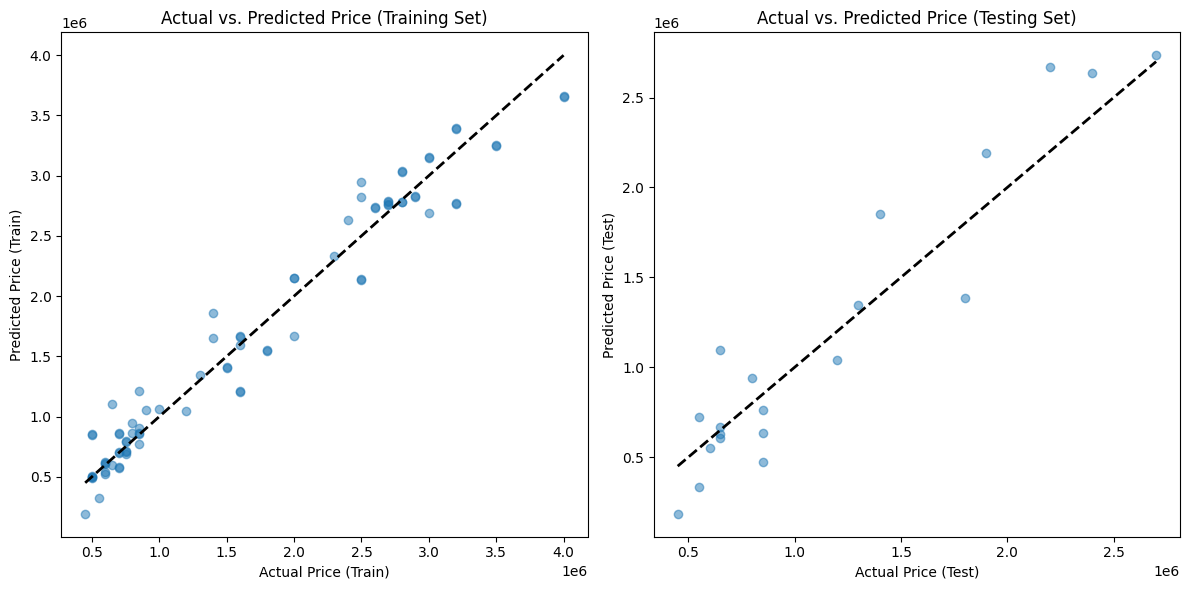


Analysis of Model Quality:
The scatter plots show the relationship between actual and predicted prices.
For a perfect model, all points would lie on the diagonal line.
The RMSE values indicate the typical error in predictions.
RMSE on training data (210293.58) is a measure of how well the model fits the training data.
RMSE on testing data (258181.56) is a measure of how well the model generalizes to unseen data.
Compare the two RMSE values to check for overfitting.
Observe the spread of the points around the diagonal line to assess the model's predictive accuracy visually.


In [44]:
# Remove non-numeric columns from X_train and X_test
X_train = X_train.select_dtypes(include='number')
X_test = X_test.select_dtypes(include='number')

# Verify the columns are now all numeric
X_train.info()
X_test.info()

# Тренування моделі
model = LinearRegression()
model.fit(X_train, y_train)

# Now continue with the rest of Task 6
# 2. Зробіть передбачення на  X_train, X_test.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Знайдіть і виведіть root mean squared error
#rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
#rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
#print(f"RMSE on training data: {rmse_train}")
#print(f"RMSE on testing data: {rmse_test}")

# Тренувальний набір
rmse_train = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
# Тестовий набір
rmse_test = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")

# 3. Побудуйте графік розсіювання передбачень проти реальних даних
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("Actual Price (Train)")
plt.ylabel("Predicted Price (Train)")
plt.title("Actual vs. Predicted Price (Training Set)")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # Add a diagonal line for reference

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual Price (Test)")
plt.ylabel("Predicted Price (Test)")
plt.title("Actual vs. Predicted Price (Testing Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for reference

plt.tight_layout()
plt.show()

# Проаналізуйте якість моделі
print("\nAnalysis of Model Quality:")
print("The scatter plots show the relationship between actual and predicted prices.")
print("For a perfect model, all points would lie on the diagonal line.")
print(f"The RMSE values indicate the typical error in predictions.")
print(f"RMSE on training data ({rmse_train:.2f}) is a measure of how well the model fits the training data.")
print(f"RMSE on testing data ({rmse_test:.2f}) is a measure of how well the model generalizes to unseen data.")
print("Compare the two RMSE values to check for overfitting.")
print("Observe the spread of the points around the diagonal line to assess the model's predictive accuracy visually.")

# На тренувальному сеті модель працює краще ніж на тесті. Дає більш чіткіші припущення.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_train_scaled

array([[ 1.09092769,  0.56881254, -0.69387081, ...,  0.53530338,
        -0.97530483,  0.79539491],
       [ 0.10038127, -0.32344242, -0.03953291, ..., -0.99413485,
         1.02532046,  0.79539491],
       [-0.92554181, -0.32344242, -0.03953291, ..., -0.99413485,
        -0.97530483,  0.79539491],
       ...,
       [-1.63307497, -0.32344242,  1.81442446, ...,  0.53530338,
         1.02532046,  0.79539491],
       [-0.89016515,  0.56881254, -0.69387081, ...,  0.53530338,
         1.02532046,  0.79539491],
       [ 0.80791442,  0.56881254, -0.69387081, ..., -0.99413485,
         1.02532046,  0.79539491]])

In [48]:
scaler.mean_

array([5.3162500e+01, 2.0183625e+03, 2.8362500e+04, 1.7062500e+01,
       1.9107375e+03, 1.6688750e+02, 5.2250000e+00, 1.0000000e-01,
       1.1250000e-01, 1.1250000e-01, 6.2500000e-02, 7.5000000e-02,
       5.0000000e-02, 6.2500000e-02, 1.1250000e-01, 1.2500000e-01,
       1.0000000e-01, 8.7500000e-02, 6.5000000e-01, 4.8750000e-01,
       6.1250000e-01])

In [49]:
scaler.var_

array([7.99036094e+02, 1.25609375e+00, 8.40810938e+07, 1.16335937e+01,
       4.31270294e+05, 6.62974984e+03, 5.49375000e-01, 9.00000000e-02,
       9.98437500e-02, 9.98437500e-02, 5.85937500e-02, 6.93750000e-02,
       4.75000000e-02, 5.85937500e-02, 9.98437500e-02, 1.09375000e-01,
       9.00000000e-02, 7.98437500e-02, 4.27500000e-01, 2.49843750e-01,
       2.37343750e-01])

In [50]:
model.coef_

array([ 1.98416545e+02, -7.82119090e+03, -1.02947768e+01, -3.86171285e+04,
       -3.25522637e+01,  6.10107135e+03, -2.89925704e+03,  7.56997386e+05,
        7.31220833e+05, -3.02439927e+05, -1.87580541e+05, -5.06581958e+05,
       -5.75037200e+05, -3.92102822e+05,  7.36415668e+05, -1.27890334e+05,
        1.24349231e+05, -2.57350336e+05,  6.47639895e+04,  3.67810997e+05,
        2.39529366e+05])

In [51]:
model.intercept_

np.float64(17019640.059263192)

In [52]:
np.append(model.coef_, model.intercept_)

array([ 1.98416545e+02, -7.82119090e+03, -1.02947768e+01, -3.86171285e+04,
       -3.25522637e+01,  6.10107135e+03, -2.89925704e+03,  7.56997386e+05,
        7.31220833e+05, -3.02439927e+05, -1.87580541e+05, -5.06581958e+05,
       -5.75037200e+05, -3.92102822e+05,  7.36415668e+05, -1.27890334e+05,
        1.24349231e+05, -2.57350336e+05,  6.47639895e+04,  3.67810997e+05,
        2.39529366e+05,  1.70196401e+07])

In [53]:
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
# Create a DataFrame for the feature weights (coefficients)
weights_df = pd.DataFrame(model.coef_, index=X_train.columns, columns=['Weight'])

# You can access the intercept separately if needed
# intercept_value = model.intercept_

In [55]:
weights_df.sort_values(by='Weight', ascending=False)

,Weight
Power,496769.214899
Brand_Mercedes,210048.781148
Brand_BMW,208407.313783
Brand_Audi,205600.147769
Fuel_Type_Code,183848.018909
Transmission_Code,116693.768206
Owner_Type_Codes,42344.952815
Brand_Toyota,15805.701511
Car_ID,5608.685421
Seats,-2148.924549


#Висновки
Найвпливовішими коефіцієнтами є потужність авто. І відповідно, бренди Мерседес, БМВ, Ауді.

In [56]:
# Import the necessary library
import plotly.express as px

# Assuming you want to plot Power and Kilometers_Driven from the scaled features
# and Price from the target variable y_train.
# First, recreate X_train_scaled as a DataFrame with column names for plotting

# Get the column names from the original X_train before scaling
scaled_column_names = X_train.columns

# Create a DataFrame from the scaled data with the original column names and index
X_train_scaled = pd.DataFrame(X_train_scaled, columns=scaled_column_names, index=X_train.index)

# Combine the scaled features and the target variable into a single DataFrame for plotting
# This is necessary because plotly express expects all data in one DataFrame
plot_data = pd.concat([X_train_scaled, y_train.rename('Price')], axis=1)

# Now use this combined DataFrame for plotting
# Make sure the column names in the plot function match the DataFrame column names
fig = px.scatter_3d(plot_data, x='Power', y='Brand_Mercedes', z='Price')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [57]:
fig = px.scatter(plot_data, x='Power', y='Price', title='Power vs. Price')
fig.update_traces(marker_size=5)
fig.show()

In [58]:
cars_df.Price.corr(cars_df.Power)

np.float64(0.8566198336904812)

In [59]:
model.coef_, model.intercept_

(array([   5608.68542149,   -8765.64571392,  -94398.72148597,
        -131715.51202972,  -21377.45333789,  496769.21489874,
          -2148.92454899,  205600.14776875,  208407.31378257,
        -118209.45031066,  -62753.005386  , -152304.86391146,
        -140945.16290405, -112259.96701985,  210048.78114763,
         -65996.24697212,   15805.70151142,  -92968.2600652 ,
          42344.95281544,  183848.01890892,  116693.76820576]),
 np.float64(1680000.0000000002))

In [61]:
model.feature_names_in

AttributeError: 'LinearRegression' object has no attribute 'feature_names_in'

In [62]:
# The LinearRegression object does not have a feature_names_in_ attribute in this version of scikit-learn.
# You can access the feature names from the DataFrame used to train the model (X_train).
print("Feature names used for training:")
print(X_train.columns)

# You can access the coefficients and intercept directly from the model object:
print("\nCoefficients and Intercept:")
print(model.coef_, model.intercept_)

Feature names used for training:
Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Owner_Type_Codes',
       'Fuel_Type_Code', 'Transmission_Code'],
      dtype='object')

Coefficients and Intercept:
[   5608.68542149   -8765.64571392  -94398.72148597 -131715.51202972
  -21377.45333789  496769.21489874   -2148.92454899  205600.14776875
  208407.31378257 -118209.45031066  -62753.005386   -152304.86391146
 -140945.16290405 -112259.96701985  210048.78114763  -65996.24697212
   15805.70151142  -92968.2600652    42344.95281544  183848.01890892
  116693.76820576] 1680000.0000000002


**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [66]:
import statsmodels.api as sm

# Додаємо константу
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Вирівнюємо індекси
X_train_scaled_const = X_train_scaled_const.reset_index(drop=True)
y_train_aligned = y_train.reset_index(drop=True)

# Навчання моделі
model_sm = sm.OLS(y_train_aligned, X_train_scaled_const).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           2.01e-33
Time:                        16:54:04   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.74e+0

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [68]:
# Відібрані ознаки з p-value < 0.05
selected_features = [
    'Mileage', 'Power', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford',
    'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes',
    'Brand_Volkswagen', 'Fuel_Type_Code', 'Transmission_Code'
]

# Створюємо нову матрицю ознак
X_selected = X_train_scaled[selected_features]

# Додаємо константу
X_selected_const = sm.add_constant(X_selected)

# Вирівнюємо індекси
X_selected_const = X_selected_const.reset_index(drop=True)
y_train_aligned = y_train.reset_index(drop=True)

# Будуємо модель
model_selected = sm.OLS(y_train_aligned, X_selected_const).fit()

# Виводимо результати
print(model_selected.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           4.12e-39
Time:                        16:59:26   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.78e+0

Модель зі статистично значущими ознаками є ефективнішою та компактнішою, з майже такою ж якістю, як повна модель. Вона підходить для використання, якщо мета — баланс між точністю та простотою.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [69]:
selected_features_025 = [
    'Kilometers_Driven', 'Mileage', 'Power', 'Brand_Audi', 'Brand_BMW',
    'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra',
    'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata', 'Brand_Volkswagen',
    'Fuel_Type_Code', 'Transmission_Code'
]

In [70]:
X_025 = X_train_scaled[selected_features_025]
X_025_const = sm.add_constant(X_025)

# Скидання індексу
X_025_const = X_025_const.reset_index(drop=True)
y_train_aligned = y_train.reset_index(drop=True)

model_025 = sm.OLS(y_train_aligned, X_025_const).fit()
print(model_025.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           4.85e-38
Time:                        17:06:02   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

Високий R² = 0.958, майже як у повної моделі.
Adjusted R² = 0.948, навіть вищий, ніж у моделі з p < 0.05.
Більшість ознак значущі (p < 0.05), тож вибір на основі p < 0.25 добре спрацював.


